In [5]:
import thermofield_boltz_funcs as bz
from quant_rotor.core.hamiltonian import hamiltonian
from quant_rotor.models.support_ham import H_kinetic_sparse, H_potential_sparse
from quant_rotor.core.de_solve_one_thermal import integration_scheme
import numpy as np
from quant_rotor.models.support_ham import write_matrix_elements, basis_m_to_p_matrix_conversion, H_kinetic, H_potential
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from quant_rotor.models.stat_mech_thermo import generate_graphs, A, Z, S, heat_capacity, U, beta_func

# One body hamiltonian.

In [2]:
sites = 1
states = 3

K, V = write_matrix_elements((states-1)//2)

In [3]:
K_tilda = bz.H_tilde_maker(K)

[1. 1.]


In [4]:
time,t_0, one_max_TDCC, dTa_idt_sol = integration_scheme(sites, states, 1, t_init=0,t_final=100,nof_points=10000, import_K_V=True, K_import=K_tilda, V_import=V)

ValueError: cannot reshape array of size 81 into shape (1,1,1,1)

/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


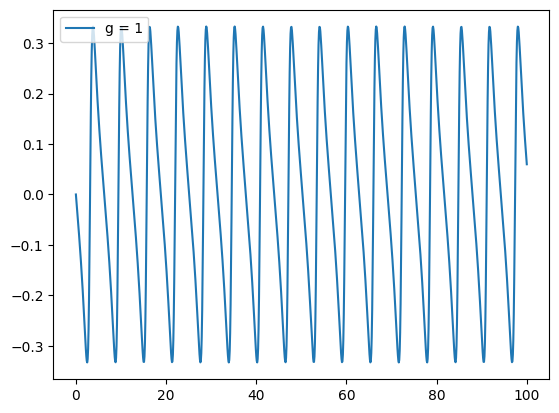

In [ ]:
plt.plot(time, t_0, label=f"g = {g}")
plt.legend()
plt.show()

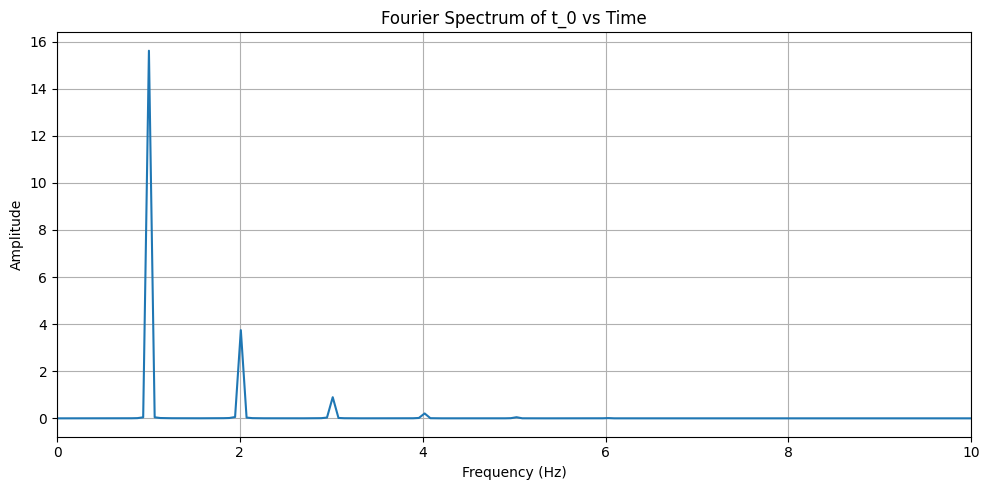

Dominant Frequencies: [1.005309649149 2.010619298297 3.015928947446 4.021238596595 5.026548245744 6.031857894892 7.037167544041]


In [ ]:
# Ensure t_0 is real or extract real part
t_0_real = np.real(t_0)
y = 1*np.exp(1j*4.5*time) + 0.5*np.exp(1j*2*time) 

# Time step (assumes uniform sampling)
N = len(time)
dt = time[-1]/N

# FFT
fft_vals = np.fft.fftshift(np.fft.fft(t_0_real))
freqs = np.fft.fftshift(np.fft.fftfreq(N, dt))* 2*np.pi

# Take positive half
positive_freqs = freqs[N//2:]
fft_magnitude = np.abs(fft_vals[N//2:])**2/N

# Plot FFT spectrum
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, fft_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier Spectrum of t_0 vs Time")
plt.xlim(0,10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify top peaks

peaks, _ = find_peaks(fft_magnitude, height=0.001)  # threshold as 10% of max
dominant_freqs = positive_freqs[peaks]
print("Dominant Frequencies:", dominant_freqs)

In [ ]:
eig_val, eig_vec = np.linalg.eigh(K_tilda)

In [ ]:
eig_val

array([-0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.])

# Oz funtion test.

In [ ]:
states = 3
sites = 3
g = 1

H_K_V = hamiltonian(states, sites, g)
K_final = H_kinetic_sparse(states, sites, H_K_V[1])
V_final = H_potential_sparse(states, sites, H_K_V[2], g)
K = K_final.toarray()
V = V_final.toarray()


H_tilda = bz.H_tilde_maker(H_K_V[0])
K_tilda = bz.H_tilde_maker(K)
V_tilda = bz.H_tilde_maker(V)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:122: ComplexWarning: Casting complex values to real discards the imaginary part
  H_Tilde_2[i,k + physical_hilbert_dim*j] = diagonal_basis[j,i]*hamiltonian[j,k]
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:143: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[:physical_hilbert_dim,:physical_hilbert_dim] = H_Tilde_1
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[physical_hilbert_dim:,physical_hilbert_dim:] = H_tilde_4


In [ ]:
np.array_equal(H_tilda, K_tilda + V_tilda)

True

In [ ]:
np.set_printoptions(threshold=np.inf)
physical_hilbert_dim = np.shape(H_K_V[0])[0]

In [ ]:
eig_val_tilda, eig_vec_tilda = np.linalg.eigh(H_tilda)
eig_val, eig_vec = np.linalg.eigh(H_K_V[0])

In [ ]:
eig_val

array([-0.02002102681 ,  0.78532515952 ,  0.945133503798,  0.945133503798,  1.090833695337,  1.098685120478,  1.098685120478,  1.816280326647,  1.867712434447,  1.867712434447,  1.95          ,  1.95          ,  1.95          ,  2.05          ,  2.1           ,  2.1           ,  2.103740700163,  2.132287565553,  2.132287565553,  3.            ,  3.            ,  3.001314879522,  3.001314879522,  3.004866496202,  3.004866496202,  3.009166304663,  3.01467484048 ])

In [ ]:
eig_val_tilda[::26]

array([-0.02002102681 , -0.02002102681 ,  0.78532515952 ,  0.945133503798,  0.945133503798,  1.090833695337,  1.098685120478,  1.098685120478,  1.816280326647,  1.867712434447,  1.867712434447,  1.95          ,  1.95          ,  1.95          ,  2.05          ,  2.1           ,  2.1           ,  2.103740700163,  2.132287565553,  2.132287565553,  3.            ,  3.            ,  3.001314879522,  3.001314879522,  3.004866496202,  3.004866496202,  3.009166304663,  3.01467484048 ,  3.01467484048 ])

In [ ]:
tf = 10

In [ ]:
time,t_0, one_max_TDCC, two_max_TDCC, dTa_idt_sol, dTab_ijdt_sol = integration_scheme(sites, states, g, t_init=0,t_final=tf,nof_points=10000, import_K_V=True, K_import=K, V_import=V)

ValueError: cannot reshape array of size 729 into shape (9,9,9,9,9)

# H tilda modified.

In [6]:
site = 3
state = 3
g = 0.1

In [7]:
K, V = write_matrix_elements((state-1)//2)
V_from_npy = V + V.T - np.diag(np.diag(V))
V_tensor = V_from_npy.reshape(state, state, state, state)

K_in_p = basis_m_to_p_matrix_conversion(K)
V_in_p = basis_m_to_p_matrix_conversion(V_tensor)

V_in_p = V_in_p.reshape(state**2, state**2)

K_final = H_kinetic(state, site, K_in_p)
V_final = H_potential(state, site, V_in_p, g)

In [8]:
K_tilda = bz.H_tilde_maker(K_final)
V_tilda = bz.H_tilde_maker(V_final)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:122: ComplexWarning: Casting complex values to real discards the imaginary part
  H_Tilde_2[i,k + physical_hilbert_dim*j] = diagonal_basis[j,i]*hamiltonian[j,k]
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:143: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[:physical_hilbert_dim,:physical_hilbert_dim] = H_Tilde_1
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/thermofield_boltz_funcs.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[physical_hilbert_dim:,physical_hilbert_dim:] = H_tilde_4


In [9]:
beta, t_0_dB, t_0_sol  = integration_scheme(site, state, 1, t_init=0,t_final=10,nof_points=100000, import_K_V=True, K_import=K_tilda, V_import=K_tilda)

(27, 27, 27, 27)


/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


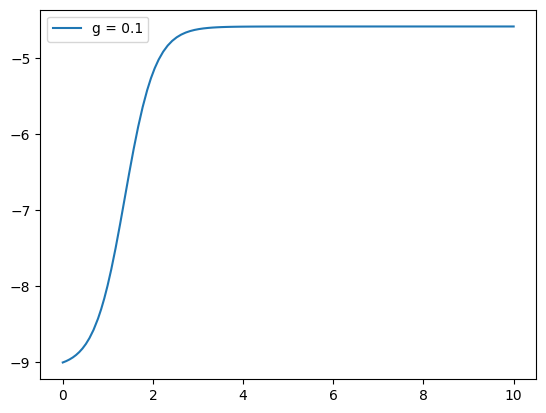

In [10]:
plt.plot(beta, t_0_dB, label=f"g = {g}")
plt.legend()
plt.show()

In [11]:
t_0_sol.shape

(108,)

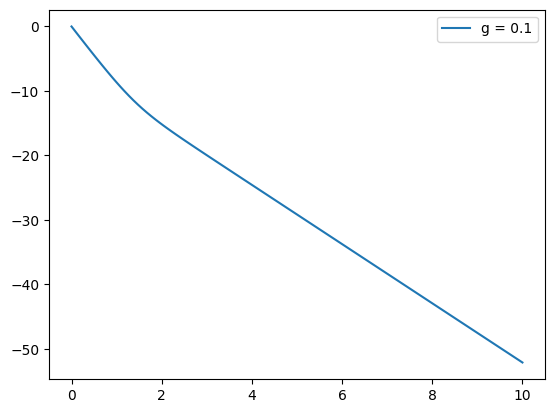

In [12]:
plt.plot(beta, t_0_sol, label=f"g = {g}")
plt.legend()
plt.show()

In [13]:
H_tilda = K_tilda + V_tilda
eig_val, _ = np.linalg.eigh(H_tilda)

In [14]:
H = hamiltonian(state, site, g)[0]
eig_val_ED, _ = np.linalg.eigh(H)

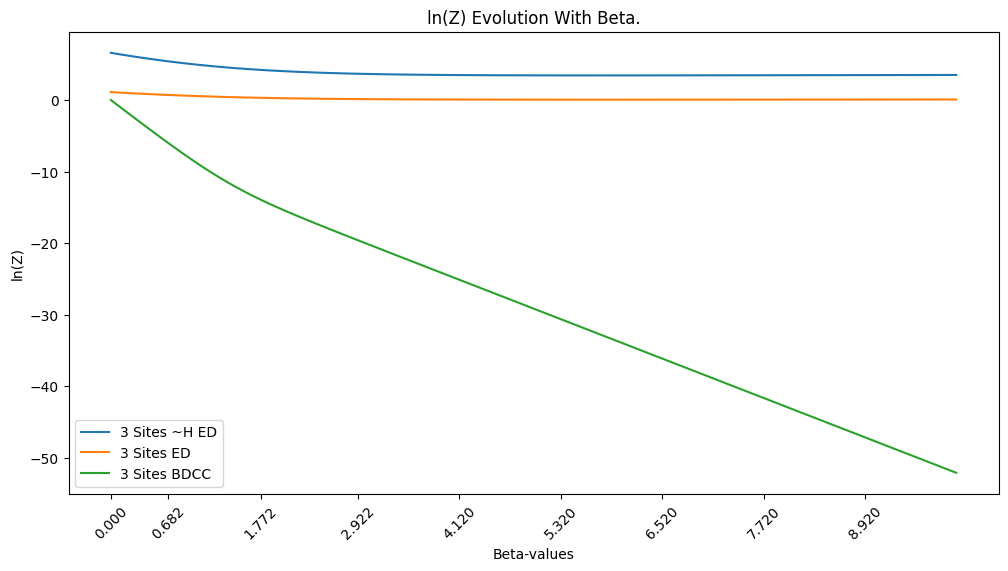

In [32]:
index = np.argsort(eig_val)
eig_val = eig_val[index]
beta_array = beta

y_data_Z = np.array([np.log(Z(eig_val, x)) for x in beta_array])
y_data_Z_ED = np.array([np.log(Z(eig_val_ED, x))/site for x in beta_array])

plt.figure(figsize=(12, 6))
plt.plot(beta_array, y_data_Z, label=f"{site} Sites ~H ED")
plt.plot(beta_array, y_data_Z_ED, label=f"{site} Sites ED")
plt.plot(beta_array, t_0_sol, label=f"{site} Sites BDCC")
plt.xticks(beta_array[::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("ln(Z)")
plt.title("ln(Z) Evolution With Beta.")
plt.legend()
plt.show()

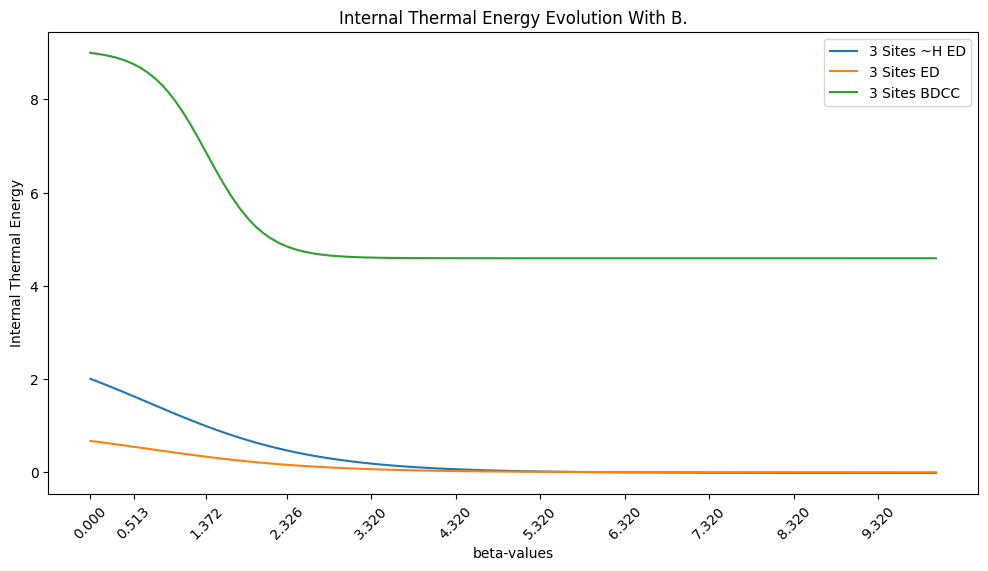

In [ ]:
beta_array = beta
y_data_U = np.array([U(eig_val, x) for x in beta_array])
y_data_U_ED = np.array([U(eig_val_ED, x) for x in beta_array])

plt.figure(figsize=(12, 6))
plt.plot(beta_array, y_data_U, label=f"{site} Sites ~H ED")
plt.plot(beta_array, y_data_U_ED, label=f"{site} Sites ED")
plt.plot(beta_array, -t_0_dB, label=f"{site} Sites BDCC")
plt.xticks(beta_array[::10], rotation=45) 
plt.xlabel("beta-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.")
plt.legend()
plt.show()

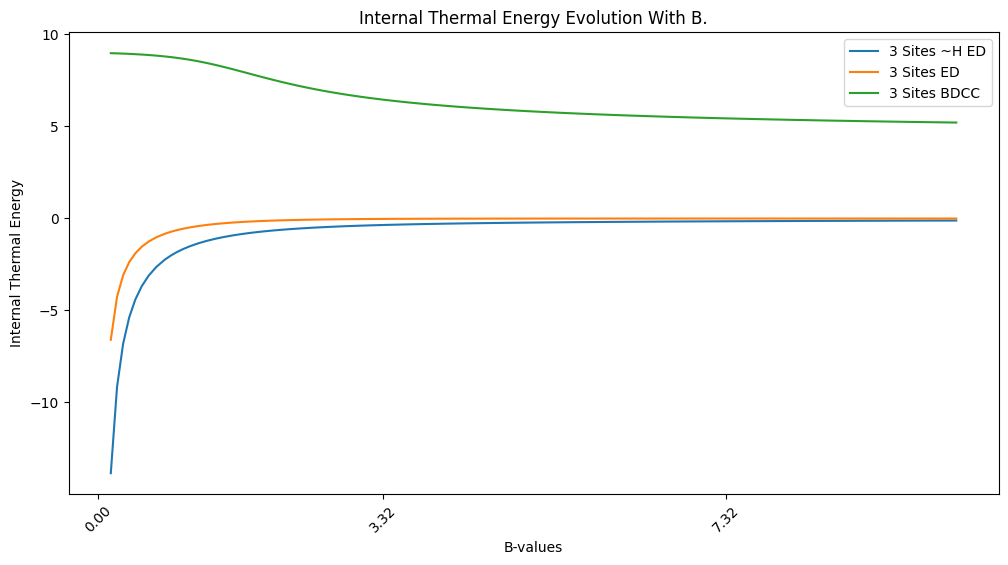

In [34]:
d = 5

y_data_A = np.array([A(eig_val, x)/site for x in beta_array[d:]])
y_data_A_ED = np.array([A(eig_val_ED, x)/site for x in beta_array[d:]])

plt.figure(figsize=(12, 6))
plt.plot(beta_array[d:], y_data_A, label=f"{site} Sites ~H ED")
plt.plot(beta_array[d:], y_data_A_ED, label=f"{site} Sites ED")
plt.plot(beta_array[d:], (-beta[d:]**(-1)) * t_0_sol[d:], label=f"{site} Sites BDCC")
plt.xticks(beta_array[::40], rotation=45) 
plt.xlabel("B-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.")
plt.legend()
plt.show()

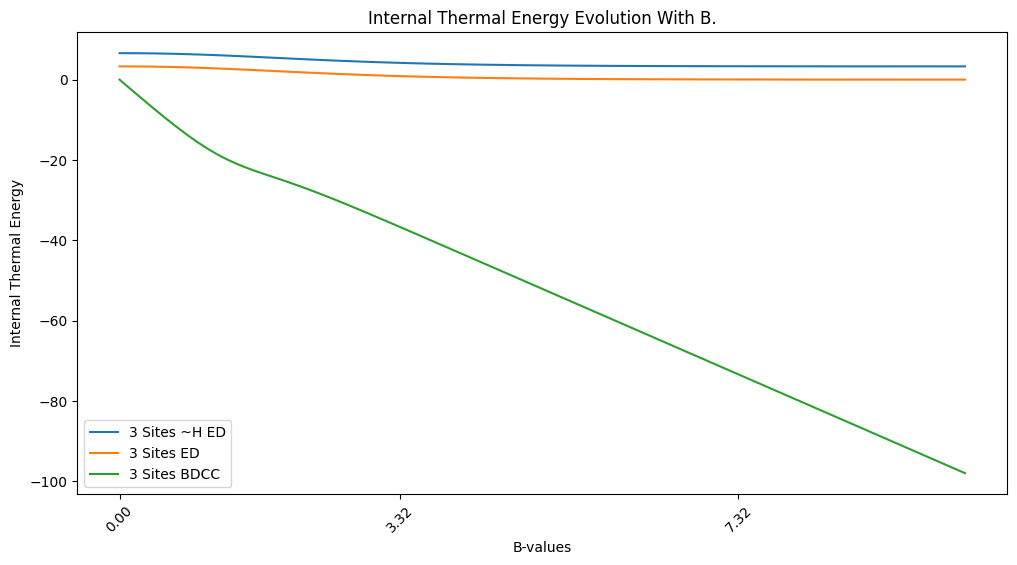

In [45]:
d = 0

y_data_S = np.array([S(eig_val, x) for x in beta_array[d:]])
y_data_S_ED = np.array([S(eig_val_ED, x) for x in beta_array[d:]])
beta_vas = np.array([beta_func(x) for x in beta_array])

plt.figure(figsize=(12, 6))
plt.plot(beta_array[d:], y_data_S, label=f"{site} Sites ~H ED")
plt.plot(beta_array[d:], y_data_S_ED, label=f"{site} Sites ED")
plt.plot(beta_array[d:], beta_array[d:] * t_0_dB[d:] + t_0_sol[d:], label=f"{site} Sites BDCC")
plt.xticks(beta_array[d:][::40], rotation=45) 
plt.xlabel("B-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.")
plt.legend()
plt.show()


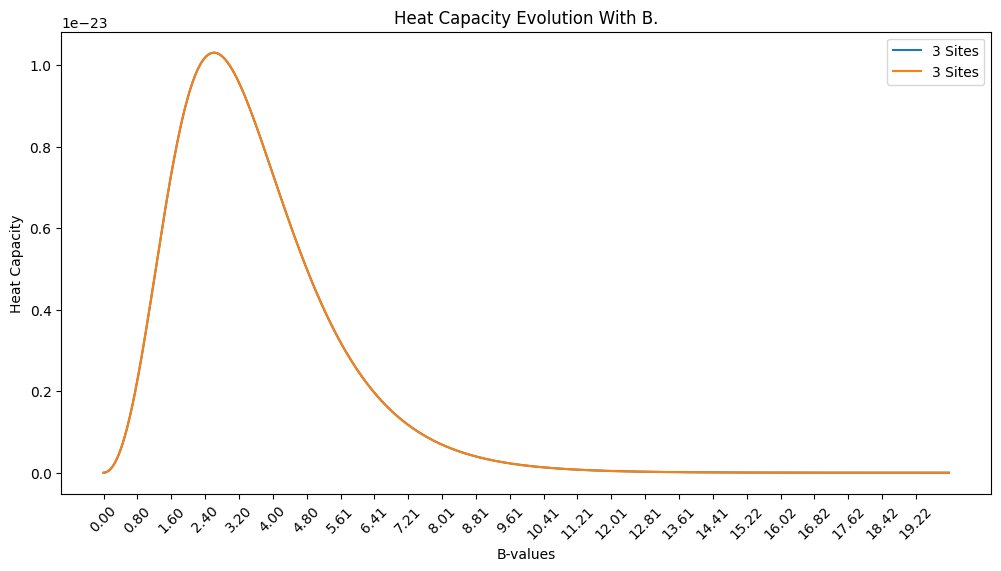

In [ ]:

beta_array = np.linspace(0, 20, 1000)

y_data_heat_capacity = np.array([heat_capacity(eig_val, x)/site for x in beta_array])
y_data_heat_capacity_ED = np.array([heat_capacity(eig_val_ED, x)/site for x in beta_array])

plt.figure(figsize=(12, 6))
plt.plot(beta_array, y_data_heat_capacity, label=f"{site} Sites")
plt.plot(beta_array, y_data_heat_capacity_ED, label=f"{site} Sites")
plt.xticks(beta_array[::40], rotation=45) 
plt.xlabel("B-values")
plt.ylabel("Heat Capacity")
plt.title("Heat Capacity Evolution With B.")
plt.legend()
plt.show()